In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sc
import cv2 as cv2
import matplotlib.pyplot as plt

In [3]:
import scipy.io as scio

In [4]:
import h5py

In [5]:
comb_data = h5py.File('../Aditya_data/combustion_img_13.mat','r')

In [6]:
comb_data.keys()

[u'test_set_x',
 u'test_set_y',
 u'train_set_x',
 u'train_set_y',
 u'valid_set_x',
 u'valid_set_y']

In [7]:
train_data = comb_data['train_set_x'][()]

In [90]:
y = comb_data['train_set_y'][()]

In [91]:
np.shape(y)

(54000, 1)

In [92]:
X_test = comb_data['test_set_x'][()]
y_test = comb_data['test_set_y'][()]

In [93]:
np.shape(X_test)

(25000, 18000)

In [8]:
np.shape(train_data)

(25000, 54000)

In [11]:
testimage = train_data[:,5039]

In [12]:
testimage = np.reshape(testimage,[250,100])

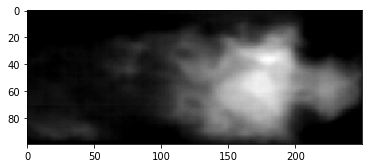

In [13]:
plt.imshow(testimage.T, cmap = 'gray')

In [14]:
img = testimage.T

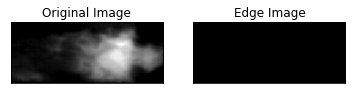

In [15]:
edges = cv2.Canny(img,100,250)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
   
plt.show()

In [18]:
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

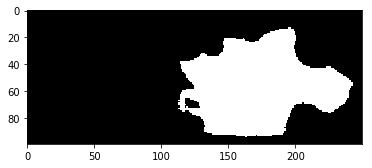

In [19]:
plt.imshow(th2, cmap='gray')

In [23]:
ret1,th1 = cv2.threshold(img,40,255,cv2.THRESH_BINARY)

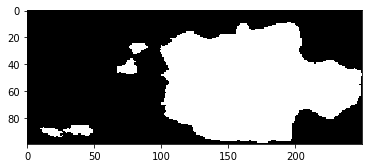

In [24]:
plt.imshow(th1, cmap='gray')

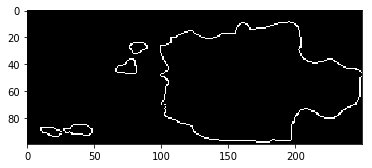

In [25]:
edge_th1 = cv2.Canny(th1,100,250)
plt.imshow(edge_th1,cmap='gray')

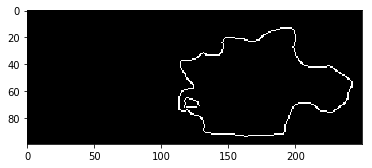

In [26]:
edge_th2 = cv2.Canny(th2,100,250)
plt.imshow(edge_th2,cmap='gray')

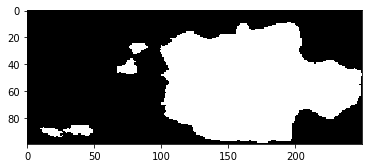

In [42]:

params = cv2.SimpleBlobDetector_Params()
     
# Change thresholds
params.minThreshold = 0;
params.maxThreshold = 256;

# Filter by Area.
params.filterByArea = True
params.minArea = 1

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.1

# Filter by Inertia
params.filterByInertia =False
params.minInertiaRatio = 0.1

detector = cv2.SimpleBlobDetector_create(params)
# Detect blobs.
keypoints = detector.detect(th1)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(th1, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)
cv2.imwrite("testimage.jpg", im_with_keypoints)

plt.imshow(im_with_keypoints)

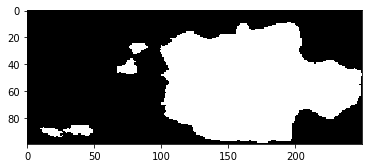

In [34]:
plt.imshow(im_with_keypoints)

In [43]:
from skimage.feature import hog
from skimage import data, exposure

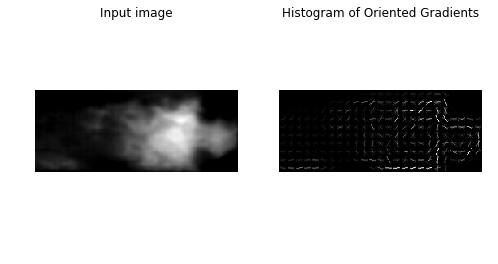

In [74]:
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(10, 10),
                    cells_per_block=(1, 1), visualise=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [75]:
np.shape(fd)

(2250,)

In [71]:
from sklearn.datasets import make_classification
>>> X, y = make_classification(n_samples=1000, n_features=4,
...                            n_informative=2, n_redundant=0,
...                            random_state=0, shuffle=False)

In [63]:
np.shape(X)

(1000, 4)

In [68]:
y = np.reshape(y,[1000,1])

In [70]:
np.shape(y.T)

(1, 1000)

In [72]:
X = np.zeros([54000,1250])

In [73]:
n = np.shape(train_data)[1]
print n

54000


In [89]:
for i in range(0,n):
    temp_image = train_data[:,i]
    
    temp_image = np.reshape(temp_image,[250,100])
    temp_image = temp_image.T
    temp_fd = hog(temp_image, orientations=5, pixels_per_cell=(10, 10),
                    cells_per_block=(1, 1))
    
    X[i,:] = temp_fd

(array([ 438.,   75.,   53.,   38.,   38.,   48.,   35.,   42.,   44.,
          43.,   32.,   33.,   22.,   25.,   24.,   26.,   22.,   21.,
          16.,   10.,   12.,   12.,   16.,   14.,    9.,   11.,    9.,
          14.,    8.,    8.,    7.,    9.,    2.,    4.,    3.,    2.,
           4.,    3.,    1.,    3.,    0.,    1.,    4.,    3.,    1.,
           1.,    1.,    0.,    0.,    3.]),
 array([ 0.        ,  0.01999895,  0.03999789,  0.05999684,  0.07999579,
         0.09999474,  0.11999368,  0.13999263,  0.15999158,  0.17999053,
         0.19998947,  0.21998842,  0.23998737,  0.25998632,  0.27998526,
         0.29998421,  0.31998316,  0.33998211,  0.35998105,  0.37998   ,
         0.39997895,  0.4199779 ,  0.43997684,  0.45997579,  0.47997474,
         0.49997369,  0.51997263,  0.53997158,  0.55997053,  0.57996948,
         0.59996842,  0.61996737,  0.63996632,  0.65996526,  0.67996421,
         0.69996316,  0.71996211,  0.73996105,  0.75996   ,  0.77995895,
         0.79995

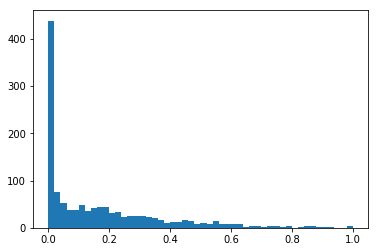

In [88]:
plt.hist(X[1,:], 50)

In [95]:
X_test_final = np.zeros([18000,1250])

In [96]:
for i in range(0,18000):
    temp_image = X_test[:,i]
    
    temp_image = np.reshape(temp_image,[250,100])
    temp_image = temp_image.T
    temp_fd = hog(temp_image, orientations=5, pixels_per_cell=(10, 10),
                    cells_per_block=(1, 1))
    
    X_test_final[i,:] = temp_fd

In [97]:
np.shape(y_test)

(18000, 1)

In [113]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=2,max_depth=2, random_state=0)

In [114]:
clf.fit(X, y)

/local/viraj/venvs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [115]:
y_test_predict=clf.predict(X_test_final)

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict)

0.88127777777777783